# Importation des modules

In [4]:
# Pour manipuler et visualider des données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# #Pour générer automatiquement un rapport détaillé de l'analyse des données
import sweetviz as sv

# Pour lire les fichiers json
import json

import missingno as msno

# Chargement des données

In [5]:
df = pd.read_csv("audio_features_2022_genre.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110090 entries, 0 to 110089
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        110090 non-null  int64  
 1   popularity        110090 non-null  float64
 2   duration_ms       110090 non-null  float64
 3   key               110090 non-null  float64
 4   mode              110090 non-null  float64
 5   time_signature    110090 non-null  float64
 6   acousticness      110090 non-null  float64
 7   danceability      110090 non-null  float64
 8   energy            110090 non-null  float64
 9   instrumentalness  110090 non-null  float64
 10  liveness          110090 non-null  float64
 11  loudness          110090 non-null  float64
 12  speechiness       110090 non-null  float64
 13  valence           110090 non-null  float64
 14  tempo             110090 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 12.6 MB


In [7]:
df = df.drop_duplicates()

In [8]:
df

,Unnamed: 0,popularity,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,66.0,230667.0,1.0,0.0,4.0,0.032200,0.676,0.4610,0.000001,0.358,-6.746,0.1430,0.7150,87.917
1,1,49.0,188793.0,9.0,1.0,4.0,0.292000,0.573,0.5350,0.000000,0.156,-6.257,0.0297,0.3410,130.013
2,2,41.0,160467.0,7.0,1.0,4.0,0.000153,0.432,0.7960,0.002090,0.266,-7.262,0.0606,0.2710,141.868
3,3,49.0,111735.0,7.0,0.0,4.0,0.907000,0.639,0.2010,0.000023,0.124,-16.613,0.0526,0.4000,88.107
4,4,49.0,57470.0,7.0,1.0,5.0,0.974000,0.318,0.1470,0.000000,0.118,-10.711,0.0550,0.1390,87.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110085,110791,6.0,40183.0,4.0,1.0,3.0,0.979000,0.118,0.0011,0.966000,0.109,-34.140,0.0422,0.0554,74.613
110086,110792,6.0,489453.0,2.0,1.0,4.0,0.137000,0.362,0.5330,0.000000,0.358,-8.319,0.0313,0.0693,144.016
110087,110793,6.0,474627.0,2.0,1.0,4.0,0.158000,0.356,0.5950,0.000020,0.753,-5.976,0.0350,0.0703,145.587
110088,110794,6.0,95147.0,6.0,0.0,4.0,0.057700,0.708,0.6950,0.000000,0.263,-4.981,0.0835,0.6610,148.048


In [10]:
df = df.drop([3000])

In [11]:
df = df[[     
 'popularity',
'duration_ms',
'key',        
 'mode',          
 'time_signature', 
 'acousticness',  
 'danceability', 
 'energy',           
 'instrumentalness',  
 'liveness',         
 'loudness',         
 'speechiness',     
 'valence',        
 'tempo']].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110089 entries, 0 to 110089
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        110089 non-null  float64
 1   duration_ms       110089 non-null  float64
 2   key               110089 non-null  float64
 3   mode              110089 non-null  float64
 4   time_signature    110089 non-null  float64
 5   acousticness      110089 non-null  float64
 6   danceability      110089 non-null  float64
 7   energy            110089 non-null  float64
 8   instrumentalness  110089 non-null  float64
 9   liveness          110089 non-null  float64
 10  loudness          110089 non-null  float64
 11  speechiness       110089 non-null  float64
 12  valence           110089 non-null  float64
 13  tempo             110089 non-null  float64
dtypes: float64(14)
memory usage: 12.6 MB


In [13]:
df.to_csv("audio_features_2022_genre.csv", index=False)

# Analyse univariée

In [14]:
# Utiliser sweetviz pour générer un rapport
report = sv.analyze(df)

# Afficher le rapport
report.show_html()

/home/apprenant/Documents/POC/env/lib/python3.9/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/apprenant/Documents/POC/env/lib/python3.9/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/home/apprenant/Documents/POC/env/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/apprenant/Documents/POC/env/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/apprenant/Documents/POC/env/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/apprenant/Documents/POC/env/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is d

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Analyse bivariée

### Tableau des corrélations

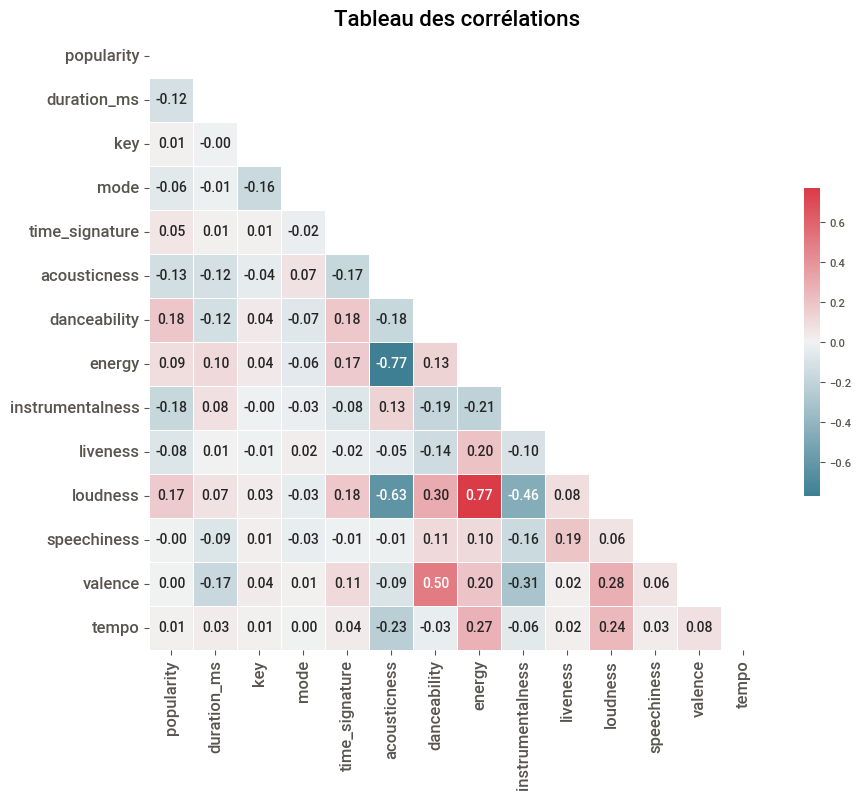

In [15]:
# Calculer la matrice de corrélation
corr = df.corr()

# Créer un masque pour masquer la partie supérieure de la table de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool))

# Personnaliser la palette de couleurs pour la table de corrélation
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Définir les dimensions de la figure
fig, ax = plt.subplots(figsize=(10, 8))

# Créer la heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            ax=ax)

# Personnaliser les ticks des axes
ax.tick_params(axis='both', which='major', labelsize=12, labelrotation=0)

# Ajouter un titre
plt.title("Tableau des corrélations", fontsize=16)
plt.xticks(rotation=90)

# Afficher la figure
plt.show()